# Jupyter Notebook files

You can create content with Jupyter notebooks.
For example, the content for the current page is contained in {download}`this notebook file <./notebooks.ipynb>`.

```{margin}
If you'd like to write in plain-text files, but still keep a notebook structure, you can write
Jupyter notebooks with MyST Markdown, which are then automatically converted to notebooks.
See [](./myst-notebooks.md) for more details.
```

Jupyter Book supports all Markdown that is supported by Jupyter Notebook.
This is mostly a flavour of Markdown called [CommonMark Markdown](https://commonmark.org/) with minor modifications.
For more information about writing Jupyter-flavoured Markdown in Jupyter Book, see [](./markdown.md).

## Code blocks and image outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

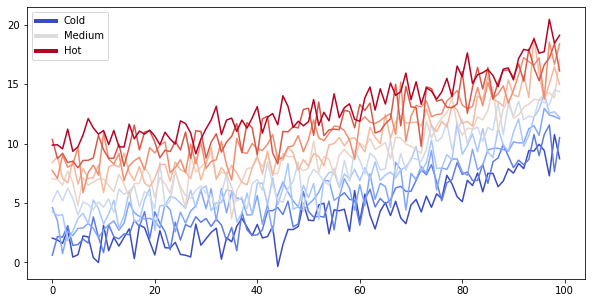

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

Note that the image above is captured and displayed in your site.

[Text(0.5, 1.0, 'Smoother linez')]

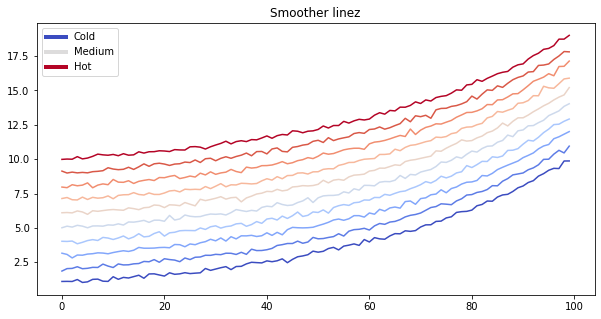

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + .1*np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
ax.set(title="Smoother linez")

```{margin} **You can also pop out content to the side!**
For more information on how to do this,
check out the {ref}`layout/sidebar` section.
```

## Removing content before publishing

You can also remove some content before publishing your book to the web. 
For reference, {download}`you can download the notebook content for this page <notebooks.ipynb>`.

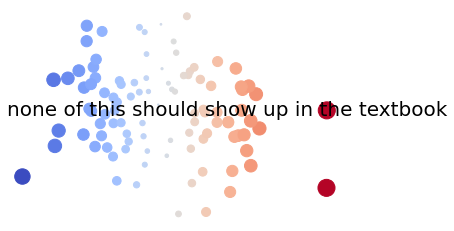

In [4]:
thisvariable = "none of this should show up in the textbook"

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

You can **remove only the code** so that images and other output still show up.

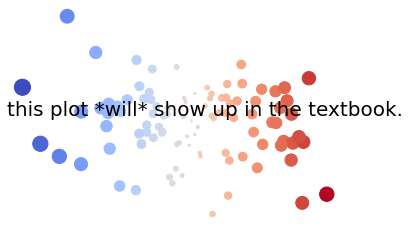

In [5]:
thisvariable = "this plot *will* show up in the textbook."

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

Which works well if you'd like to quickly display cell output without cluttering your content with code.
This works for any cell output, like a Pandas DataFrame.

In [6]:
import pandas as pd
pd.DataFrame([['hi', 'there'], ['this', 'is'], ['a', 'DataFrame']], columns=['Word A', 'Word B'])

,Word A,Word B
0,hi,there
1,this,is
2,a,DataFrame


See {ref}`hiding/remove-content` for more information about hiding and removing content.

## Interactive outputs

We can do the same for *interactive* material. Below we'll display a map
using [folium](https://python-visualization.github.io/folium/). When your book is built,
the code for creating the interactive map is retained.

```{margin}
**This will only work for some packages.** They need to be able to output standalone
HTML/Javascript, and not
depend on an underlying Python kernel to work.
```

In [7]:
import folium
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

m

In [8]:
import geemap

In [9]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

## Rich outputs from notebook cells

Because notebooks have rich text outputs, you can store these in
your Jupyter Book as well! For example, here is the command line help
menu, see how it is nicely formatted.

In [10]:
!jupyter-book build --help

Usage: jupyter-book build [OPTIONS] PATH_SOURCE

  Convert your book's or page's content to HTML or a PDF.

Options:
  --path-output TEXT              Path to the output artifacts
  --config TEXT                   Path to the YAML configuration file
                                  (default: PATH_SOURCE/_config.yml)

  --toc TEXT                      Path to the Table of Contents YAML file
                                  (default: PATH_SOURCE/_toc.yml)

  -W, --warningiserror            Error on warnings.
  -n, --nitpick                   Run in nit-picky mode, to generates warnings
                                  for all missing references.

  --keep-going                    With -W, do not stop the build on the first
                                  warning, instead error on build completion

  --all                           Re-build all pages. The default is to only
                                  re-build pages that are new/changed since
                                  t

And here is an error. You can mark notebook cells as "expected to error" by adding a
`raises-exception` tag to them.

In [11]:
this_will_error

NameError: name 'this_will_error' is not defined

## More features with Jupyter notebooks

There are many other features of Jupyter notebooks to take advantage of,
such as automatically generating Binder links for notebooks or connecting your content with a kernel in the cloud.
For more information browse the pages in this site, and [](content:code-outputs) in particular.